In [13]:
#Kerakli bolgan barcha kutubxonalarni yuklab olamiz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [14]:
# O'zimizga kerakli datani yuklab olamiz yoki qolda yozamiz
data = {
    "Uy_maydoni_m2": [50, 70, 90, 110, 130, 85, 120, 140, 60, 100],
    "Narxi_ming_$": [60, 85, 120, 150, 170, 100, 160, 200, 55, 130]
}
df = pd.DataFrame(data)
print(df.head())

   Uy_maydoni_m2  Narxi_ming_$
0             50            60
1             70            85
2             90           120
3            110           150
4            130           170


In [15]:
# Bu qadamda datamizni x va y ga ajratamiz
X = df[["Uy_maydoni_m2"]]
y = df["Narxi_ming_$"]

In [57]:
# BU yerda datamizni trein va testga ajratib beradi 80% datamiz train uchun 20% datamiz test uchun ajratiladi
# random_state=5 bundan foydalanishdan maqsad har doim bir xil natija qaytarish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [58]:
# Madel yaratdik
lr_model = LinearRegression()


In [59]:
# Madelimizga datamizni o'rgatamiz bu qadamda
lr_model.fit(X_train, y_train)

LinearRegression()

In [60]:
# y=mx+b bu yerda coef_ = m ga teng boladi intercept_ = b ga teng boladi
weight = lr_model .coef_[0]
bias = lr_model .intercept_

In [62]:
# Uy maydoni = 0 bolsa Uy narxi=(Og‘irlik×Uy maydoni)+Bias
# Madel parametrini chiqaradi. Bunda Har 1 kv.m uy maydoni 1.5 ming $ oshadi, Boshlang‘ich qiymat -26 ming $.
print("Og‘irlik:", weight)
print("Bias:", bias)

Og‘irlik: 1.595467897608057
Bias: -29.827947964750308


In [75]:
# Bu kod madelning bashorat qiymatlarini chiqaradi
LR_y = weight*X + bias

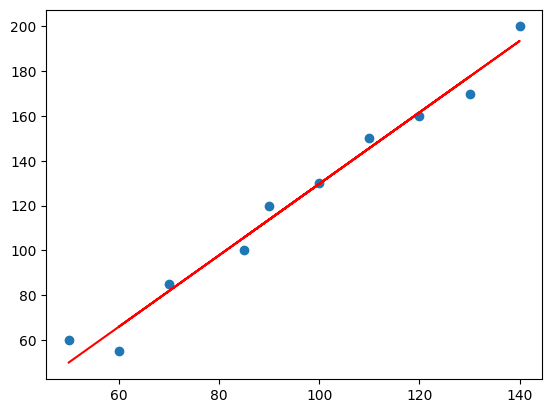

In [76]:
# Chiziqli regressiya grafigi bunda scatter(X, y) haqiqiy malumotlar plot(X, LR_y, c='r') madel bashorati
plt.scatter(X, y)
plt.plot(X, LR_y, c='r')
plt.show()

In [77]:
# Bunda madel test toplam boyicha bashorat qiladi
bashorat = lr_model.predict(X_test)
print(bashorat)

[113.76416282 161.62819975]


In [78]:
#Bunda haqiqiy qiymatdan bashorat qilingan qiymatni ayirib xatolik topilyapti
xato = y_test - bashorat
print(xato)

2    6.235837
6   -1.628200
Name: Narxi_ming_$, dtype: float64


In [83]:
# o'zimiz ixtiyoriy uy maydonini b
my_grade = lr_model.predict([[65]])
print(my_grade)

[73.87746538]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [84]:
y_pred = lr_model.predict(X_test)

In [87]:
# Bu qatorda kodimizning xatoligini tekshiramiz.
# MAE – o‘rtacha mutloq xato, MSE – o‘rtacha kvadratik xato, RMSE – kvadrat ildiz orqali hisoblangan xato.
# R² – model aniqligini o‘lchaydi (1 ga yaqin bo‘lsa – yaxshi model).
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [88]:
# Hamma xatoliklarni chiqatib beradi
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 3.9320184641208584
MSE: 20.76834987793842
RMSE: 4.557230505245309
R2: 0.9480791253051539
